# Definición de Proyecto GRD

## 1. Integrantes del grupo
- Estudiante 1: Luis Nicolas Pino
- Estudiante 2: Marcial Ibáñez


## 2. Título tentativo del proyecto
Análisis de la distribución de recursos hospitalarios en el sistema de salud pública basado en GRD Chile 2024


## 3. Declaración del problema desde el usuario
Los servicios de salud pública deben mantener una administración eficiente de sus recursos para garantizar una atención continua y de calidad a la población chilena. 
Para lograr dicha eficiencia, es fundamental realizar análisis constantes sobre las características de la población del país y su experiencia con el sistema de salud pública.

La falta de análisis continuos impide una asignación de recursos contingente a las necesidades actuales, afectando la calidad y cobertura del sistema de salud pública en Chile.

## 4. Pregunta principal de investigación
¿Cómo afectan las caracteristicas fisiologicas de un paciente y el contexto de su condicion en el costo hospitalario producido por estos en el Servicio de Salud Público?

## 5. Preguntas secundarias (mínimo 2)
- Pregunta secundaria 1: ¿Cómo se ve afectado el peso hospitalario por los días de estancia?
- Pregunta secundaria 2: ¿Cuáles son los rangos etarios con mayor y menor costo asociado?
- Pregunta secundaria 3: ¿Cómo se relaciona el tipo de ingreso con la edad del paciente, y de qué manera afectan al costo hospitalario?

## 6. Variables principales y justificación de selección
- Variable 1: Peso - Justificación: El proyecto se enfoca en estudiar su comportamiento y el efecto en las demás variables
- Variable 2: Días de estancia - Justificación: Variable para estudiar el efecto de la duración de la estancia en los recursos hospitalarios.
- Variable 3: Edad  - Justificación: variable para clasificar a la población en grupos etarios y estudiar el comportamiento de cada grupo.
- (Opcional) Variable 4: Sexo - Justificación: variable para clasificar biologicamente a los pacientes y analizar comportamientos.
- (Opcional) Variable 5: Tipo Ingreso - Justificación: variable para observar el efecto del contexto del ingreso en el costo y cómo este afecta a los demás.

## 7. Metodología estadística propuesta

- Método 1: Estadística Descriptiva- Propósito: Conocer el comportamiento de las variables individualmente.
- Método 2: Estadística multivariada- Propósito: Relacionar el comportamiento de varias variables (Peso, Tipo Ingreso, Edad) y cómo se influyen entre ellas, esto para poder justificar mejor las respuestas a nuestras preguntas, además de proveer un análisis más completo.
- Método 3: Estadística inferencial- Propósito: Sacar conclusiones y predicciones respecto a los datos.

-Método 1: test ANOVA (Análisis de Varianza) - Comparar las medias de Peso a través de Grupos Etarios.

-Método 2: Regresión Lineal - Sacar predicciones respecto a la Peso y los días de estancia.

-Método 3: Correlación -  Verificar el tipo de relación entre las variables propuestas y si esta es positiva, negativa o nula.

## 8. Potencial impacto y aplicación práctica
Los resultados obtenidos de esta investigación influyen en la toma de decisiones de los administradores de servicios de salud, ayudará a enfocar los esfuerzos en los grupos que más lo requieran.

## 9. Supuestos estadísticos necesarios
- Supuesto 1: Relación entre edad (grupo etario) y peso - Forma de validación: Gráficos de correlación entre ambas variables y el levantamiento de estadísticos que lo demuestren
- Supuesto 2:  - El tipo de ingreso, asi como el sexo, son factores que influyen el peso
- Forma de validación: Crear gráficos que nos permitan concluir algún tipo de relación.

## 10. Limitaciones del estudio (sesgos)
Anticipe posibles limitaciones que podrían afectar la validez o generalización de sus resultados y cómo planean mitigarlas.

- Limitación 1: 	Sesgo Etario, puede haber un posible sesgo en la densidad y distribución de población en los rangos etarios, lo cual puede afectar el análisis y la regresión lineal.
-Estrategia de mitigación: observar lógicamente las distribuciones, y ver si se levantan patrones con o sin sentido del mundo real.

- Limitación 2: Sesgo de Sexo, las caracteristicas biologicas entre ambos grupos generan diferencia en la asignacion de recursos, debido a las distintas razones por las cuales ingresan. 
-Estrategia de mitigación: se revisará la distribución y se harán análisis separados para cada grupo. 

## 11. Cronograma detallado del proyecto
Defina claramente las actividades que realizarán en cada bloque de semanas según el calendario del curso.
- Semanas 4-5: Limpieza de datos y extracción de los datos útiles para el estudio
- Semanas 6-7: Análisis de variables individualmente por servicio de salud
- Semanas 8-9: Analisis multivariable e inicio de analisis inferencial
- Semanas 10-11: Análisis inferencial para predicciones
- Semana 12 (preparación final): Conclusiones a partir de la información obtenida

## Ideas
Agregar intervalos de confianza  
Regresion lineal para tratar de predecir resultados  
Regresion lineal para control de calidad (predecir resultado, comparar con original y ver que tan bien se aplicó el tratamiento)  
 

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm, gamma, expon, lognorm, chi2, kstest, anderson
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette("deep")

# Opcional: semilla para reproducibilidad
np.random.seed(42)

In [82]:
df = pd.read_csv("..\data\GRD_2023_muestra_cancer_UCV_limpio.csv")

In [83]:
df = df[~df.isin(["DESCONOCIDO"]).any(axis=1)]
df = df[df["DIAS_ESTANCIA"] < 100]

In [84]:
bins = [0, 10, 18, 40, 65, float("inf")]
labels = ["0-9", "10-18", "19-40", "41-65", "66+"]

df["rango_etario"] = pd.cut(df["EDAD"], bins = bins, labels=labels, right=True, include_lowest = True)

In [85]:
df = df[df["DIAS_ESTANCIA"] < 60]

In [86]:
df

,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,DIAGNOSTICO1,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,TIPO_FECHA_NACIMIENTO,TIPO_FECHA_INGRESO,TIPO_FECHAALTA,EDAD,DIAS_ESTANCIA,rango_etario
0,122100,72196813,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,064161,0.7094,1.0,1.0,YMD,DMY,DMY,43.0,2,41-65
2,114101,97627974,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,044161,0.4084,1.0,1.0,YMD,DMY,DMY,3.0,1,0-9
3,106103,67770674,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,131301,0.6406,1.0,1.0,YMD,DMY,DMY,45.0,1,41-65
4,106103,100390800,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,074131,0.5346,1.0,1.0,YMD,DMY,DMY,0.0,2,0-9
5,108100,72858368,MUJER,1964-12-20,ACONCAGUA,PROGRAMADA,2023-04-24,2023-04-24,DOMICILIO,M54.99,083110,0.1032,0.0,0.0,YMD,DMY,DMY,58.0,0,41-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039582,105102,78111817,MUJER,1995-12-06,COQUIMBO,OBSTETRICA,2023-01-01,2023-01-04,DOMICILIO,O03.1,131111,0.5227,1.0,1.0,YMD,DMY,DMY,27.0,3,19-40
1039583,118100,76593606,MUJER,1991-04-26,CONCEPCIÓN,PROGRAMADA,2023-06-14,2023-06-14,DOMICILIO,N87.1,132340,0.1761,0.0,0.0,YMD,DMY,DMY,32.0,0,19-40
1039584,115100,100360940,HOMBRE,2015-01-08,LIBERTADOR B. O HIGGINS,URGENCIA,2023-11-29,2023-12-01,DOMICILIO,K35.8,061131,0.7398,1.0,1.0,YMD,DMY,DMY,9.0,2,0-9
1039585,123100,78557002,HOMBRE,2014-01-07,OSORNO,PROGRAMADA,2023-03-28,2023-03-28,DOMICILIO,J45.0,044181,0.3452,1.0,1.0,YMD,DMY,DMY,9.0,0,0-9


In [87]:
def medidas_tendencia(serie): 
    print("ESTADISTICOS DE", serie.name)

    print("\nMEDIDAS DE TENDENCIA CENTRAL")
    print("Media:", serie.mean())
    print("Mediana:",serie.median())
    print("Moda:",serie.mode()[0])

    print("\nMEDIDAS DE DISPERSION")
    print("Desviacion Estandar:",serie.std())
    print("Rango:", serie.max()-serie.min())
    print("Percentiles 25%:", serie.quantile(0.25))
    print("Percentiles 50%:", serie.quantile(0.5))
    print("Percentiles 75%:", serie.quantile(0.75))
    IQR = serie.quantile(0.75) - serie.quantile(0.25)

    # Definir límites para Atipicos
    limite_inferior = serie.quantile(0.25) - 1.5 * IQR
    limite_superior = serie.quantile(0.75) + 1.5 * IQR
    print(f"\nLimites Atipicos: [{limite_inferior}, {limite_superior}]")


    #INTERVALO DE CONFIANZA
    conf = 0.95 #la confianza a usar
    n = len(serie) #tamaño de la muestra
    media=serie.mean()
    #intervalo de confianza
    e= stats.t.interval(confidence=conf, df=n-1, loc=media, scale=stats.sem(serie)) #sem = error medio
    print("\nIntervalos de Confianza:",e)

medidas_tendencia(df["IR_29301_PESO"])

ESTADISTICOS DE IR_29301_PESO

MEDIDAS DE TENDENCIA CENTRAL
Media: 0.9312212012009093
Mediana: 0.6915
Moda: 0.4384

MEDIDAS DE DISPERSION
Desviacion Estandar: 0.9740493340580156
Rango: 20.6461
Percentiles 25%: 0.4683
Percentiles 50%: 0.6915
Percentiles 75%: 1.0328

Limites Atipicos: [-0.37845, 1.87955]

Intervalos de Confianza: (np.float64(0.9293393926091356), np.float64(0.9331030097926831))


Tamaño del Dataset: 1029220


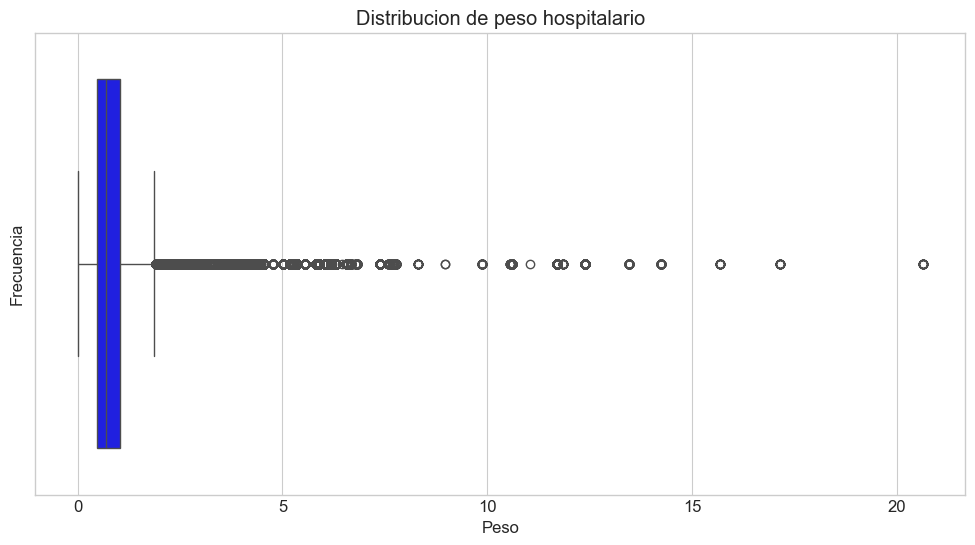

Límite inferior: -0.38
Límite superior: 1.88
Número de outliers: 72040

Tamaño del Dataset: 957180


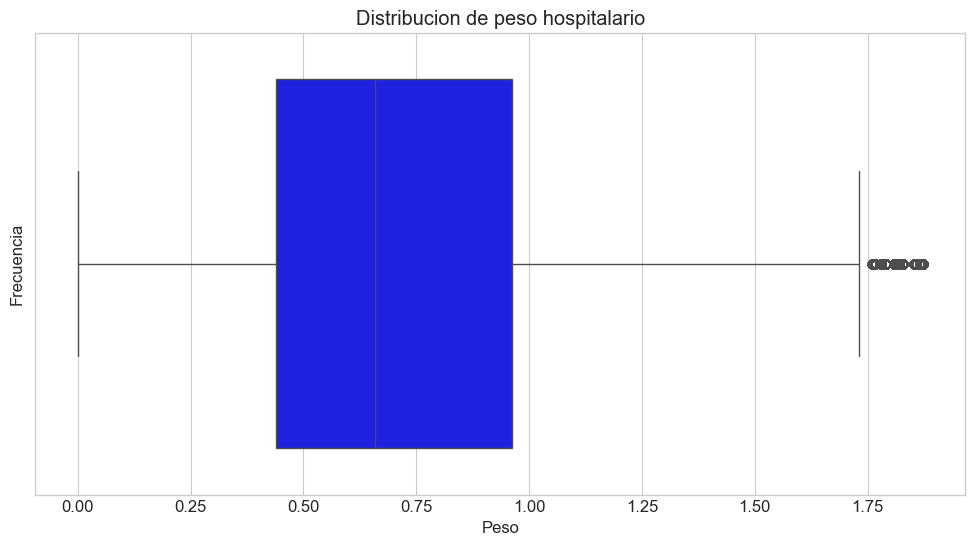

In [88]:
def cortar_outliers(df, columna):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    print(f"Límite inferior: {limite_inferior:.2f}")
    print(f"Límite superior: {limite_superior:.2f}")

    # Identificación de outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    print(f"Número de outliers: {len(outliers)}")

    # DataFrame sin outliers
    df_sin_outliers = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df_sin_outliers

print("Tamaño del Dataset:", len(df))
plt.figure(figsize=(12, 6))
sns.boxplot(x = df['IR_29301_PESO'], color='blue')
plt.title('Distribucion de peso hospitalario')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.show()

df2 = cortar_outliers(df,'IR_29301_PESO')

print("\nTamaño del Dataset:", len(df2))
plt.figure(figsize=(12, 6))
sns.boxplot(x = df2['IR_29301_PESO'], color='blue')
plt.title('Distribucion de peso hospitalario')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.show()

## Analisis por variable

### Sexo

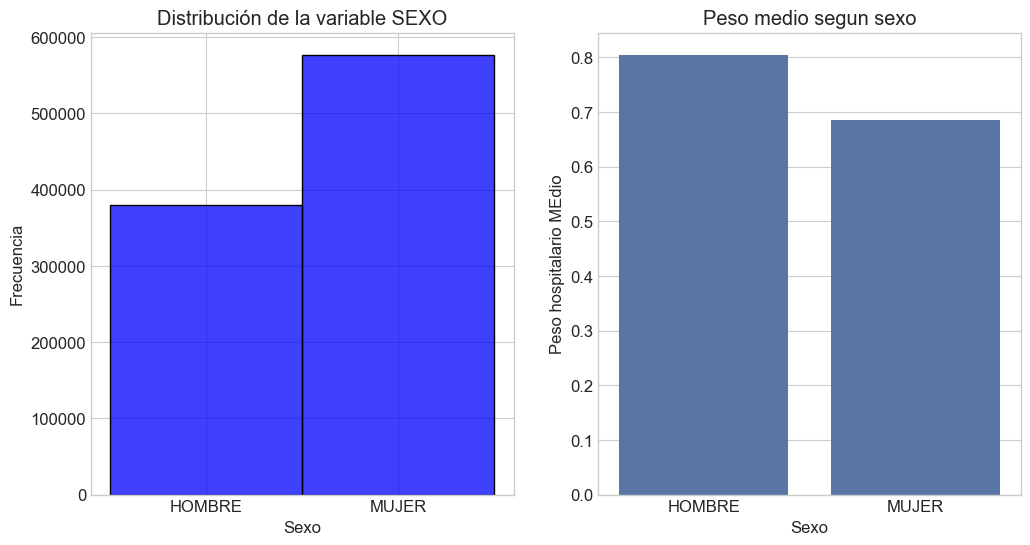

In [ ]:
#Pregunta secundaria 1 ¿Cómo se ve afectado el peso hospitalario por los días de estancia?
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df2['SEXO'], bins=50, color='blue')
plt.title('Distribución de la variable SEXO')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
df2_grouped = df2.groupby('SEXO')['IR_29301_PESO'].mean().reset_index()

# Graficar
sns.barplot(x = df2_grouped['SEXO'], y = df2_grouped['IR_29301_PESO'])
plt.title("Peso medio segun sexo")
plt.xlabel("Sexo")
plt.ylabel("Peso hospitalario MEdio")
plt.show()

Podemos observar que a pesar de que los hombres menos registros en el dataset, estos tienen un peso medio mas alto que las mujeres

### Edad y rango etario

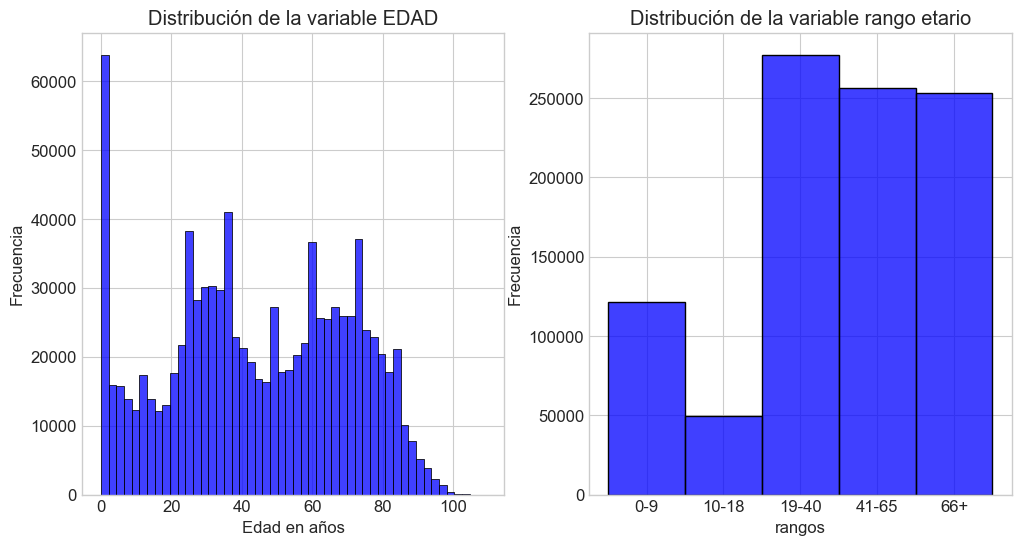

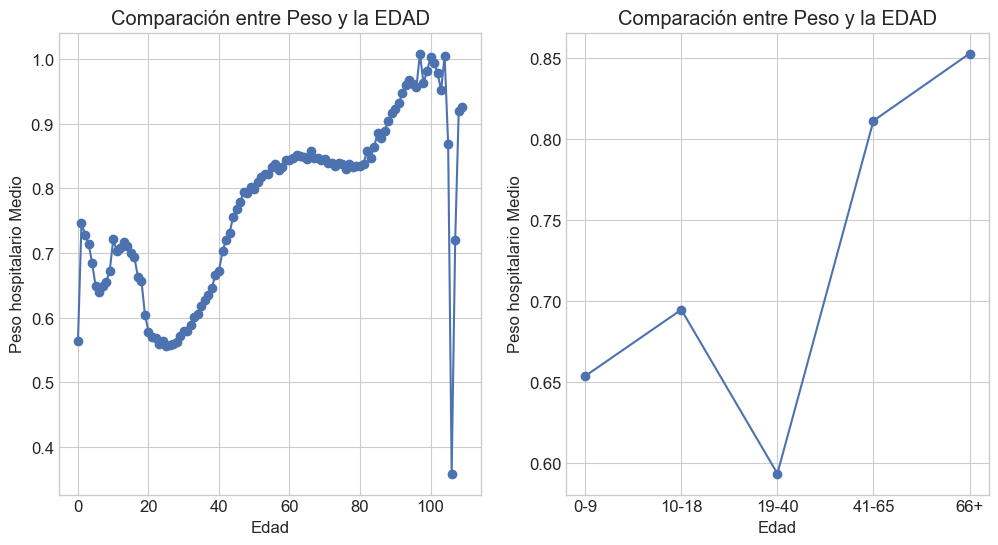

In [ ]:
#Pregunta secundaria 2: ¿Cuáles son los rangos etarios con mayor y menor costo asociado?
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df2['EDAD'], bins=50, color='blue')
plt.title('Distribución de la variable EDAD')
plt.xlabel('Edad en años')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df2['rango_etario'], color='blue')
plt.title('Distribución de la variable rango etario')
plt.xlabel("rangos")
plt.ylabel('Frecuencia')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df2_grouped = df2.groupby('EDAD')['IR_29301_PESO'].mean().reset_index()

# Graficar
plt.plot(df2_grouped['EDAD'], df2_grouped['IR_29301_PESO'], marker='o', linestyle='-')
plt.title("Comparación entre Peso y la EDAD")
plt.xlabel("Edad")
plt.ylabel("Peso hospitalario Medio")
plt.grid(True)

plt.subplot(1, 2, 2)
df2_grouped = df2.groupby('rango_etario')['IR_29301_PESO'].mean().reset_index()

# Graficar
plt.plot(df2_grouped['rango_etario'], df2_grouped['IR_29301_PESO'], marker='o', linestyle='-')
plt.title("Comparación entre Peso y la EDAD")
plt.xlabel("Edad")
plt.ylabel("Peso hospitalario Medio")
plt.grid(True)
plt.show()

### Dias de estancia

In [91]:
bins = [0, 3, 7, 14, 30, float("inf")]
labels = ["0-3", "4-7", "8-14", "15-30", "31-60"]

df2["rango_de_estancia"] = pd.cut(df2["DIAS_ESTANCIA"], bins = bins, labels=labels, right=True, include_lowest = True)

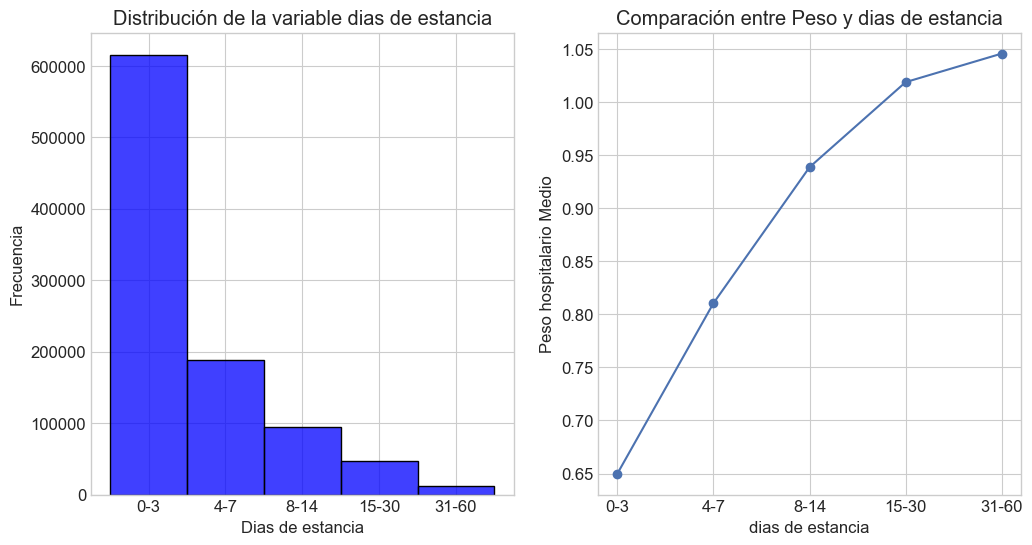

In [ ]:
#Pregunta secundaria 1 ¿Cómo se ve afectado el peso hospitalario por los días de estancia?
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

sns.histplot(df2['rango_de_estancia'], bins=50, color='blue')
plt.title('Distribución de la variable dias de estancia')
plt.xlabel('Dias de estancia')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
df2_grouped = df2.groupby('rango_de_estancia')['IR_29301_PESO'].mean().reset_index()

plt.plot(df2_grouped['rango_de_estancia'], df2_grouped['IR_29301_PESO'], marker='o', linestyle='-')
plt.title("Comparación entre Peso y dias de estancia")
plt.xlabel("dias de estancia")
plt.ylabel("Peso hospitalario Medio")
plt.grid(True)

In [93]:
# estoy hay que cambiarlo, ya que la media no es representativa para ninguno de los rangos

### Tipo de ingreso

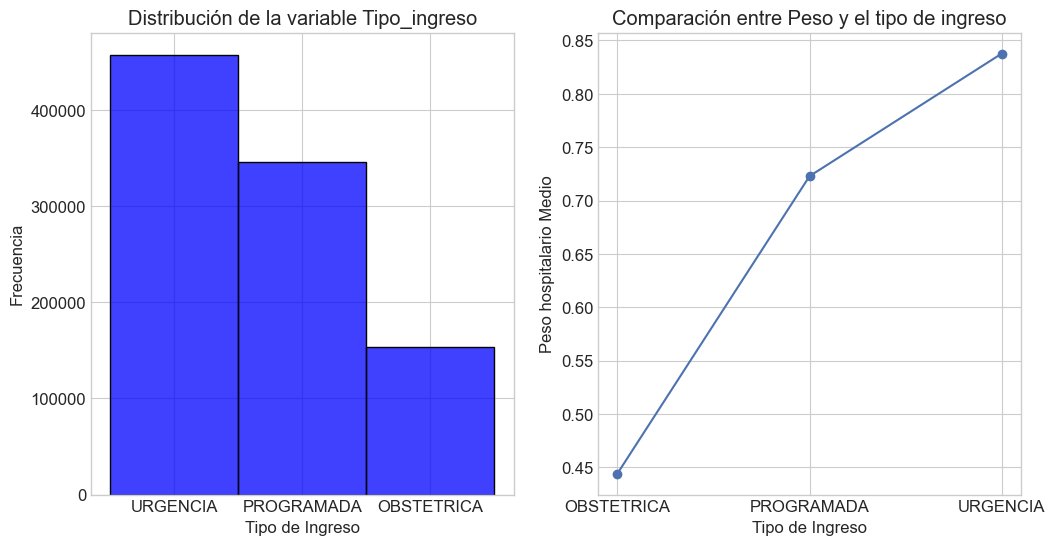

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df2['TIPO_INGRESO'], bins=50, color='blue')
plt.title('Distribución de la variable Tipo_ingreso')
plt.xlabel("Tipo de Ingreso")
plt.ylabel('Frecuencia')

df2_grouped = df2.groupby('TIPO_INGRESO')['IR_29301_PESO'].mean().reset_index()

plt.subplot(1, 2, 2)
plt.plot(df2_grouped['TIPO_INGRESO'], df2_grouped['IR_29301_PESO'], marker='o', linestyle='-')
plt.title("Comparación entre Peso y el tipo de ingreso")
plt.xlabel("Tipo de Ingreso")
plt.ylabel("Peso hospitalario Medio")
plt.grid(True)
plt.show()

## Analisis multivariado

In [ ]:
#1 - Pregunta secundaria 3: ¿Cómo se relaciona el tipo de ingreso con la edad del paciente, y de qué manera afectan al costo hospitalario?

### Tipo de ingreso y edad (y rango etario)

In [125]:
df2['tipo_ingreso_n'] = df2['TIPO_INGRESO'].map({'URGENCIA': 1, 'PROGRAMADO': 2, 'OBSTETRICA': 3}).fillna(0).astype(int)

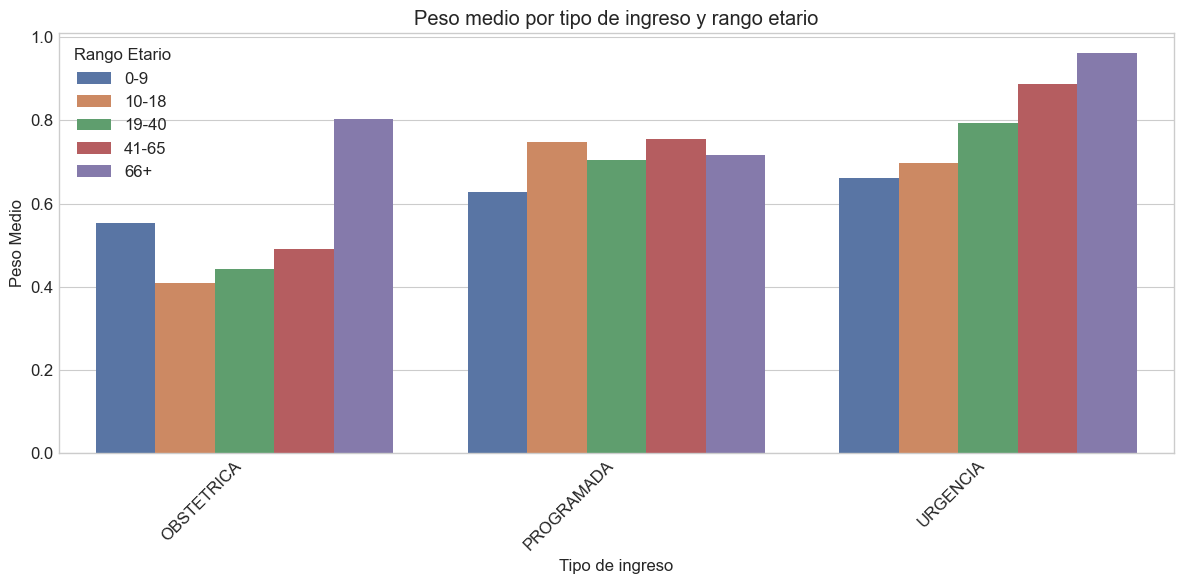

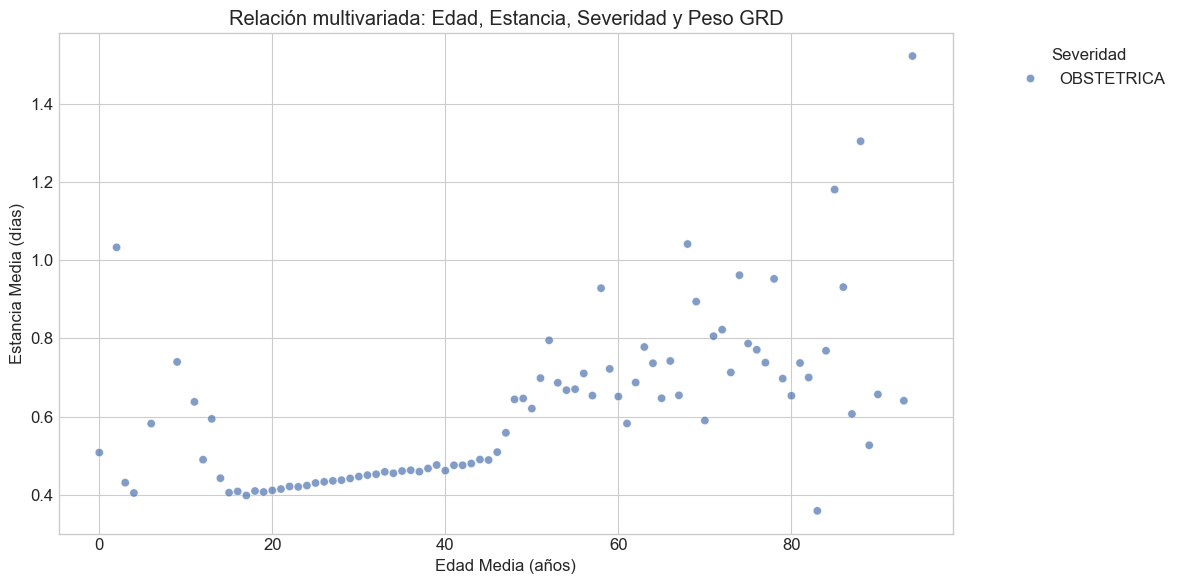

In [107]:
plt.figure(figsize=(12, 6))

df2_grouped = df2.groupby(['TIPO_INGRESO', 'rango_etario'])['IR_29301_PESO'].mean().reset_index()

sns.barplot(x='TIPO_INGRESO', y='IR_29301_PESO', hue='rango_etario', data=df2_grouped)
plt.title('Peso medio por tipo de ingreso y rango etario')
plt.xlabel('Tipo de ingreso')
plt.ylabel('Peso Medio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rango Etario')
plt.tight_layout()

plt.figure(figsize=(12, 6))

df2_grouped = df2.groupby(['TIPO_INGRESO', 'EDAD'])['IR_29301_PESO'].mean().reset_index()
df2_grouped_filter = df2_grouped[df2_grouped['TIPO_INGRESO'] == "OBSTETRICA"]

scatter = sns.scatterplot(data=df2_grouped_filter, x='EDAD', y='IR_29301_PESO', 
                         hue='TIPO_INGRESO', 
                         sizes=(50, 250), alpha=0.7)

plt.title('Relación multivariada: Edad, Estancia, Severidad y Peso GRD')
plt.xlabel('Edad Media (años)')
plt.ylabel('Estancia Media (días)')
plt.legend(title='Severidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.show()

In [134]:
df2['tipo_ingreso_n'] = df2['TIPO_INGRESO'].map({'URGENCIA': 1, 'PROGRAMADA': 2, 'OBSTETRICA': 3}).fillna(0).astype(int)

In [135]:
df2['sexo_n'] = df2['SEXO'].map({'HOMBRE': 1, 'MUJER': 2}).fillna(0).astype(int)

In [136]:
df2

,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,DIAGNOSTICO1,...,IR_29301_MORTALIDAD,TIPO_FECHA_NACIMIENTO,TIPO_FECHA_INGRESO,TIPO_FECHAALTA,EDAD,DIAS_ESTANCIA,rango_etario,rango_de_estancia,tipo_ingreso_n,sexo_n
0,122100,72196813,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,...,1.0,YMD,DMY,DMY,43.0,2,41-65,0-3,1,1
2,114101,97627974,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,...,1.0,YMD,DMY,DMY,3.0,1,0-9,0-3,1,1
3,106103,67770674,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,...,1.0,YMD,DMY,DMY,45.0,1,41-65,0-3,2,2
4,106103,100390800,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,...,1.0,YMD,DMY,DMY,0.0,2,0-9,0-3,1,2
5,108100,72858368,MUJER,1964-12-20,ACONCAGUA,PROGRAMADA,2023-04-24,2023-04-24,DOMICILIO,M54.99,...,0.0,YMD,DMY,DMY,58.0,0,41-65,0-3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039582,105102,78111817,MUJER,1995-12-06,COQUIMBO,OBSTETRICA,2023-01-01,2023-01-04,DOMICILIO,O03.1,...,1.0,YMD,DMY,DMY,27.0,3,19-40,0-3,3,2
1039583,118100,76593606,MUJER,1991-04-26,CONCEPCIÓN,PROGRAMADA,2023-06-14,2023-06-14,DOMICILIO,N87.1,...,0.0,YMD,DMY,DMY,32.0,0,19-40,0-3,2,2
1039584,115100,100360940,HOMBRE,2015-01-08,LIBERTADOR B. O HIGGINS,URGENCIA,2023-11-29,2023-12-01,DOMICILIO,K35.8,...,1.0,YMD,DMY,DMY,9.0,2,0-9,0-3,1,1
1039585,123100,78557002,HOMBRE,2014-01-07,OSORNO,PROGRAMADA,2023-03-28,2023-03-28,DOMICILIO,J45.0,...,1.0,YMD,DMY,DMY,9.0,0,0-9,0-3,2,1


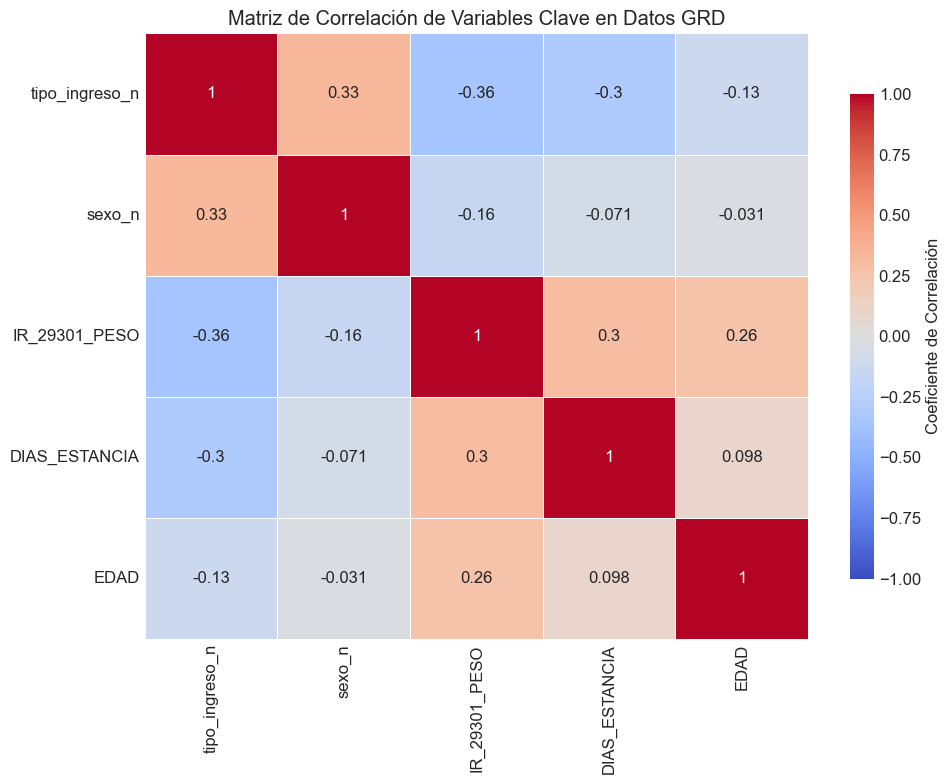

In [138]:
variables_numericas = ['tipo_ingreso_n', 'sexo_n', 'IR_29301_PESO', 'DIAS_ESTANCIA', 'EDAD']
corr_matrix = df2[variables_numericas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Coeficiente de Correlación"})
plt.title('Matriz de Correlación de Variables Clave en Datos GRD')
plt.tight_layout()
plt.show()